In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# <b> Đọc dữ liệu

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# <b> Làm sạch dữ liệu

- Hiển thị các thuộc tính chứa giá trị null

In [5]:
data_null = data.isnull().sum()
data_null = data_null[data_null > 0]
data_null.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

- Có tất cả 1460 data
    - Có một số thuộc tính có nhiều hơn 50% số data lỗi (NaN) => drop
    - Còn lại các thuộc tính dưới 50% thì ta tiến hành điền chúng

In [6]:
# Các thuộc tính có nhiều hơn 50% giá trị bị thiếu: PoolQC, Fence, MiscFeature, Alley
data = data.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'Alley'])
data.shape

(1460, 77)

In [7]:
# Các thuộc tính có dưới 50% giá trị bị thiếu: LotFrontage, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, MasVnrType, MasVnrArea
# Xem xét các thuộc tính này để xử lý giá trị bị thiếu: 
    # Với các thuộc tính số, ta có thể thay giá trị bị thiếu bằng trung bình hoặc trung vị
    # Với các thuộc tính phân loại, ta có thể thay giá trị bị thiếu bằng giá trị phổ biến nhất (mode)

# Xem xét các thuộc tính số
num_nan_cols = data.columns[(data.isnull().any()) & (data.dtypes != 'object')]

# Xem xét các thuộc tính phân loại
cat_nan_cols = data.columns[(data.isnull().any()) & (data.dtypes == 'object')]
num_nan_cols, cat_nan_cols


(Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond'],
       dtype='object'))

In [8]:
# fillna với các thuộc tính số
for col in num_nan_cols:
    median = data[col].median()
    data[col] = data[col].fillna(median)

# fillna với các thuộc tính phân loại
for col in cat_nan_cols:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)

# Kiểm tra lại giá trị bị thiếu
data.isnull().sum().max()  # Nếu kết quả là 0 thì không còn giá trị bị thiếu nữa

np.int64(0)

# <b> Xác định hệ số tương quan giữa các thuộc tính với SalePrice => Xác định được thuộc tính nào ảnh hưởng đến giá bán

- Tạo hàm tính mức độ tương quan của 2 thuộc tính thuộc kiểu giá trị số:
    - Nếu trị tuyệt đối của mức độ tương quan nằm trong khoảng từ 0 đến 0.4 => 2 thuộc tính không liên quan gì đến nhau
    - Nếu khác điều kiện trên:
        - Lớn hơn 0.4: tương quan dương
        - Nhỏ hơn -0.4: tương quan âm

In [31]:
# Hàm tính mức độ tương quan giữa 2 thuộc tính
def tuong_quan(data, x, y):
    tq = data[x].corr(data[y])
    print('Mức độ tương quan của 2 thuộc tính:', tq, '\n')
    if tq>=-0.4 and tq<=0.4:
        print('=> 2 thuộc tính không ảnh hưởng gì đến nhau!')
    elif tq>0.4:
        print('=> 2 thuộc tính tương quan dương: ',x,' tăng thì ',y,' cũng tăng và ngược lại!')
        print('Biểu đồ tương quan:\n')

        sns.scatterplot(x=data[x], y=data[y])
        sns.regplot(x=data[x], y=data[y], scatter=False, line_kws={"color": "red"})
        
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'Biểu đồ phân tán giữa {x} và {y}')
        plt.show()
    else:
        print('=> 2 thuộc tính tương quan âm: ',x,' tăng thì ',y,' giảm và ngược lại!')
        print('Biểu đồ tương quan:\n')

        sns.scatterplot(x=data[x], y=data[y])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f'Biểu đồ phân tán giữa {x} và {y}')
        plt.show()

In [24]:
tuong_quan(data,'MSSubClass', 'SalePrice')

Mức độ tương quan của 2 thuộc tính: -0.08428413512659529 

=> 2 thuộc tính không ảnh hưởng gì đến nhau!


In [25]:
tuong_quan(data,'LotFrontage', 'SalePrice')

Mức độ tương quan của 2 thuộc tính: 0.3347708531397599 

=> 2 thuộc tính không ảnh hưởng gì đến nhau!


In [26]:
tuong_quan(data,'LotArea', 'SalePrice')

Mức độ tương quan của 2 thuộc tính: 0.2638433538714056 

=> 2 thuộc tính không ảnh hưởng gì đến nhau!


Mức độ tương quan của 2 thuộc tính: 0.46675365236333993 

=> 2 thuộc tính tương quan dương:  GarageYrBlt  tăng thì  SalePrice  cũng tăng và ngược lại!
Biểu đồ tương quan:



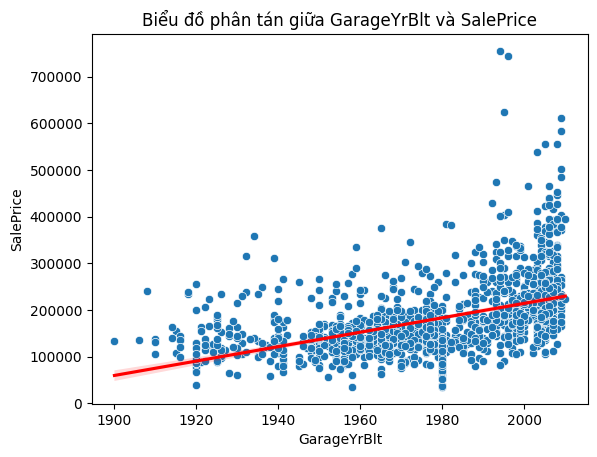

In [29]:
tuong_quan(data,'GarageYrBlt', 'SalePrice')

Mức độ tương quan của 2 thuộc tính: 0.4726144990045742 

=> 2 thuộc tính tương quan dương:  MasVnrArea  tăng thì  SalePrice  cũng tăng và ngược lại!
Biểu đồ tương quan:



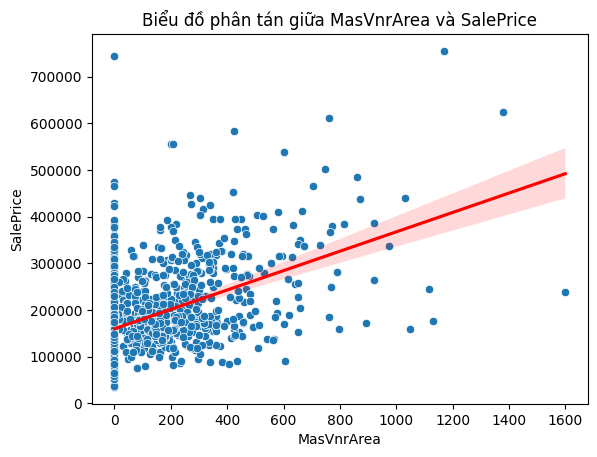

In [30]:
tuong_quan(data,'MasVnrArea', 'SalePrice')

Mức độ tương quan của 2 thuộc tính: 0.6404091972583519 

=> 2 thuộc tính tương quan dương:  GarageCars  tăng thì  SalePrice  cũng tăng và ngược lại!
Biểu đồ tương quan:



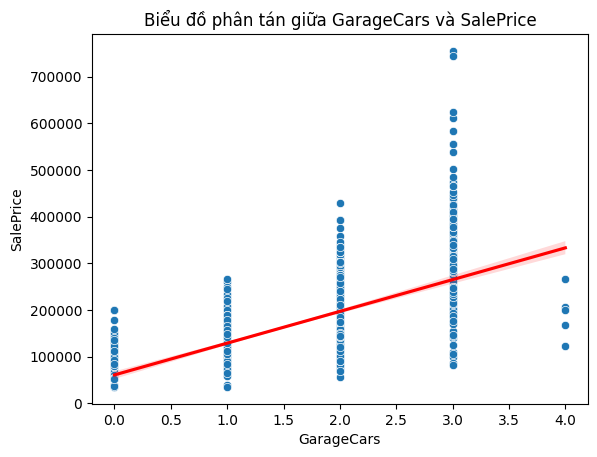

In [36]:
tuong_quan(data,'GarageCars', 'SalePrice')
    